# Réalisé par  Kossi Julien  KOWOU

#  Travaux Pratiques : EC Clustering

### Nous étudierons dans ce projet  une banque de données sur la consommation des voitures disponible sur le dépôt de l’UCI (https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

# Exercice 1. Analyse des données

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

### 1.Importation des données 

In [2]:

data = pd.read_csv("C:/Users/kowou/OneDrive/Bureau/Master/Master II/CLUSTERING/auto-mpg.csv", sep=",", header=None)
data.columns=['mpg', 'cylinders','displacement' ,'horsepower','weight','acceleration' ,'model year','origin','car name']                   
data

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

### 2. Analyse des données.

### Le type des variables

In [3]:
DATA = data.copy(deep=True)


On définit le type des variables, ainsi les variables cylinders, model year, origin, car name sont déclarées qualitatives.


In [4]:
variables_quanti= ['mpg','displacement','horsepower','weight','acceleration']

for i in DATA.columns.values:
    if i in variables_quanti:
        DATA[i] = DATA[i].astype(float)
    else:
        variables_quanti.append(i)
        DATA[i] = DATA[i].astype(str)

In [5]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    object 
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    object 
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(5), object(4)
memory usage: 28.1+ KB


In [6]:
print(f"La banque de données contient {DATA.shape[0]} et {DATA.shape[1]} variables")

La banque de données contient 398 et 9 variables


### Voici les statistiques univariées des données :

In [7]:
DATA.describe()

mpg  displacement  horsepower       weight  acceleration
count  398.000000    398.000000  392.000000   398.000000    398.000000
mean    23.514573    193.425879  104.469388  2970.424623     15.568090
std      7.815984    104.269838   38.491160   846.841774      2.757689
min      9.000000     68.000000   46.000000  1613.000000      8.000000
25%     17.500000    104.250000   75.000000  2223.750000     13.825000
50%     23.000000    148.500000   93.500000  2803.500000     15.500000
75%     29.000000    262.000000  126.000000  3608.000000     17.175000
max     46.600000    455.000000  230.000000  5140.000000     24.800000

Les statistiques  univariées des variables quantitatives montrent grâce à la ligne count que la variable
"horsepower" a 6 valeurs manquantes, car seulement 392 lignes de cette variable est considérée.

### Valeurs manquantes

In [8]:
total=DATA.isnull().sum().sort_values(ascending=False)
total

horsepower      6
mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
pourc=DATA.isnull().sum()/DATA.isnull().count()*100
pourc

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model year      0.000000
origin          0.000000
car name        0.000000
dtype: float64


La variable horsepower a effectivement 6 valeurs manquantes dans la banque de données, soit 1.5 % . Ainsi nous cherchons à imputer ces valeurs à l'aide de IterativeImputer de sklearn

Puisque les variables qualitatives cylinders, model year, origin, car name ne sont pas pertinentes, on ne les considère pas dans le processus d’imputation

In [10]:
DATA1 = DATA.iloc[:,[0,2,3,4,5]]

In [11]:
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=0)
DATA1 = imputer.fit_transform(DATA1)
DATA1 = pd.DataFrame(DATA1)

In [12]:
import numpy as np
DATA2 = pd.concat([DATA.iloc[:,0:3],DATA1.iloc[:,2], DATA.iloc[:,4:9]], axis=1, join='inner')

### Jeux de données complètes après imputation des données manquantes de l'attribut "horsepower"

In [13]:
DATA2.columns=['mpg', 'cylinders','displacement' ,'horsepower','weight','acceleration' ,'model year','origin','car name'] 
DATA2

mpg cylinders  displacement  horsepower  weight  acceleration  \
0    18.0         8         307.0       130.0  3504.0          12.0   
1    15.0         8         350.0       165.0  3693.0          11.5   
2    18.0         8         318.0       150.0  3436.0          11.0   
3    16.0         8         304.0       150.0  3433.0          12.0   
4    17.0         8         302.0       140.0  3449.0          10.5   
..    ...       ...           ...         ...     ...           ...   
393  27.0         4         140.0        86.0  2790.0          15.6   
394  44.0         4          97.0        52.0  2130.0          24.6   
395  32.0         4         135.0        84.0  2295.0          11.6   
396  28.0         4         120.0        79.0  2625.0          18.6   
397  31.0         4         119.0        82.0  2720.0          19.4   

    model year origin                   car name  
0           70      1  chevrolet chevelle malibu  
1           70      1          buick skylark 320  
2           70      1         plymouth satellite  
3           70      1              amc rebel sst  
4           70      1                ford torino  
..         ...    ...                        ...  
393         82      1            ford mustang gl  
394         82      2                  vw pickup  
395         82      1              dodge rampage  
396         82      1                ford ranger  
397         82      1                 chevy s-10  

[398 rows x 9 columns]

Ainsi voici les statistiques univariées du jeu de données après imputation. 

In [14]:
data_final = DATA2.copy(deep=True)

In [15]:
data_final.describe()

mpg  displacement  horsepower       weight  acceleration
count  398.000000    398.000000  398.000000   398.000000    398.000000
mean    23.514573    193.425879  104.086918  2970.424623     15.568090
std      7.815984    104.269838   38.380639   846.841774      2.757689
min      9.000000     68.000000   46.000000  1613.000000      8.000000
25%     17.500000    104.250000   75.000000  2223.750000     13.825000
50%     23.000000    148.500000   92.500000  2803.500000     15.500000
75%     29.000000    262.000000  125.000000  3608.000000     17.175000
max     46.600000    455.000000  230.000000  5140.000000     24.800000

Les nouvelles statistuiques univariées obtenues des données sont très proches de celles obtenues pour le jeu de données 
initial notamment pour la variable horsepower.

### Visualisons la distribution des variables en utilisant seaborn

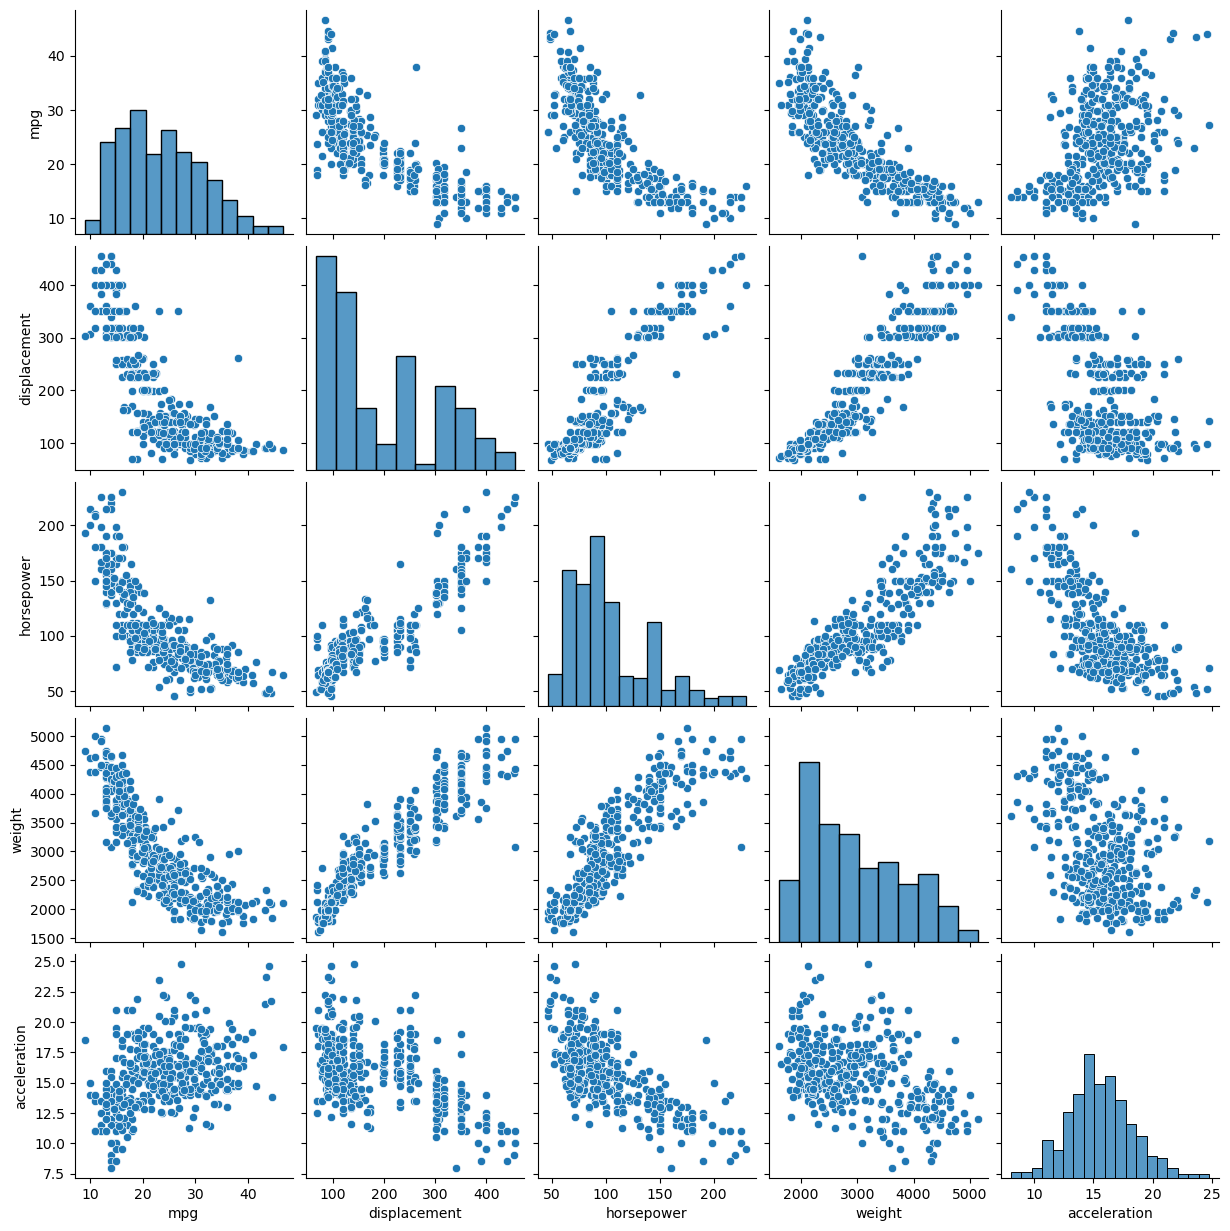

In [16]:
sns.pairplot(data_final.iloc[:,[0,2,3,4,5]])

 La valeur de "mpg" augmente quand la valeur de "acceleration" augmente.
Pour les autres variables quantitatives, la valeur de "mpg" diminue quand leurs valeurs augmentent.



Etudions les corrélation entre mpg et les autres variables quantitatives

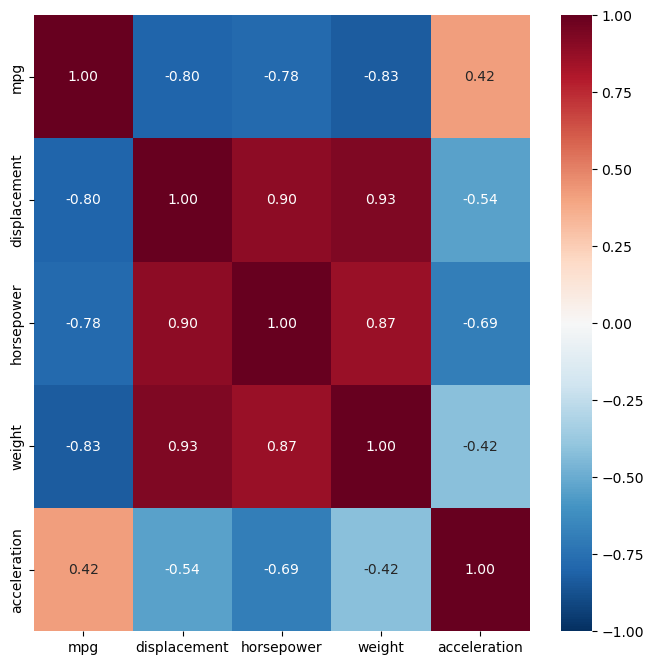

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data_final.iloc[:,[0,2,3,4,5]].corr(method="pearson"), 
            fmt= ".2f", annot=True, ax = ax, cmap = "RdBu_r", vmin = -1, vmax = 1)
plt.show()

Il y a une corrélation positive faible entre "mpg" et "accelaration" tandis que les autres variables 
quantitatives sont fortement corrélées négativement avec "mpg"

In [18]:
import plotly.express as px
values = data_final['cylinders'].value_counts()    
labels = data_final['cylinders'].unique().tolist()
fig = px.pie(values, values=values, names=labels, title='Répartition des modalités de la variable cylinders')
fig.show() 


### On remarqu'il y'a un déséquilibre existant au sein des modalités de la variable cylinders

In [19]:
import plotly.express as px
values = data_final['model year'].value_counts()    
labels = data_final['model year'].unique().tolist()
fig = px.pie(values, values=values, names=labels, title='Répartition des modalités de la variable model year')
fig.show()


### On remarque les modalités de la variable "model year" sont équilibrés

In [20]:
import plotly.express as px
values = data_final['origin'].value_counts()    
labels = data_final['origin'].unique().tolist()
fig = px.pie(values, values=values, names=labels, title='Répartition des modalités de la variable origin')
fig.show()

### On remarqu'il y'a un déséquilibre existant au sein des modalités de la variable cylinders

# Etude de la normalité des variables quantitatives

### Pour la variable "mpg"

In [21]:
     #perform shapiro test         
shapiro(DATA.iloc[:,0])   

ShapiroResult(statistic=0.967965841293335, pvalue=1.1833407853600875e-07)

D'après le test de Shapiro (de normalité), la p-valeur est inférieure à 0.05, nous rejetons 
l’hypothèse nulle. Nous avons suffisamment de preuves pour dire que la variable "mpg" ne provienne pas 
d’une distribution normale.

### Pour la variable "displacement"

In [22]:
shapiro(DATA.iloc[:,2])   #perform shapiro test 

ShapiroResult(statistic=0.8804187774658203, pvalue=5.143004392099065e-17)

D'après le test de Shapiro (de normalité), la p-valeur est inférieure à 0.05, nous rejetons 
l’hypothèse nulle. Nous avons suffisamment de preuves pour dire que la variable "displacement" ne provienne pas 
d’une distribution normale.

### Pour la variable "horsepower"

In [23]:
shapiro(DATA.iloc[:,3])   #perform shapiro test

ShapiroResult(statistic=nan, pvalue=1.0)

### Pour la variable "weight"

In [24]:
shapiro(DATA.iloc[:,4])   #perform shapiro test

ShapiroResult(statistic=0.9413598775863647, pvalue=1.9704182729896047e-11)

### Pour la variable "acceleration"

In [25]:
shapiro(DATA.iloc[:,5])   #perform shapiro test

ShapiroResult(statistic=0.9923787713050842, pvalue=0.039872437715530396)

### D'après le test de Shapiro (de normalité), toutes les  p-valeur sont inférieures à 0.05, nous rejetons l’hypothèse nulle.
### Nous avons suffisamment de preuves pour dire que toutes les variabls quantitatives notamment les variables "mpg" "displacement", "horsepower", "weight" et "acceleration" ne proviennent pas d’une distribution normale.

# Exercice 2.  Regression

### 1. Préparation des données pour prédire la variable mpg

In [26]:
x = data_final.iloc[:,1:8]     #sans la variable car name
y = data_final.iloc[:,0]
x
#y

cylinders  displacement  horsepower  weight  acceleration model year  \
0           8         307.0       130.0  3504.0          12.0         70   
1           8         350.0       165.0  3693.0          11.5         70   
2           8         318.0       150.0  3436.0          11.0         70   
3           8         304.0       150.0  3433.0          12.0         70   
4           8         302.0       140.0  3449.0          10.5         70   
..        ...           ...         ...     ...           ...        ...   
393         4         140.0        86.0  2790.0          15.6         82   
394         4          97.0        52.0  2130.0          24.6         82   
395         4         135.0        84.0  2295.0          11.6         82   
396         4         120.0        79.0  2625.0          18.6         82   
397         4         119.0        82.0  2720.0          19.4         82   

    origin  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
393      1  
394      2  
395      1  
396      1  
397      1  

[398 rows x 7 columns]

### Séparons les données : ensemble d'apprentissage et ensemble test

Pour savoir si un modèle peut se généraliser sur de nouvelles données, il faut que l'ensemble d'apprentissage et l'ensemble test soient différents.Pour cela on choisit ici 70% des données pour l'ensemble d'apprentissage et 30% pour l'ensemble test.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train

cylinders  displacement  horsepower  weight  acceleration model year  \
230         8         350.0       170.0  4165.0          11.4         77   
357         4         119.0       100.0  2615.0          14.8         81   
140         8         304.0       150.0  4257.0          15.5         74   
22          4         104.0        95.0  2375.0          17.5         70   
250         8         318.0       140.0  3735.0          13.2         78   
..        ...           ...         ...     ...           ...        ...   
323         4         156.0       105.0  2800.0          14.4         80   
192         6         250.0       105.0  3353.0          14.5         76   
117         4          68.0        49.0  1867.0          19.5         73   
47          6         250.0       100.0  3282.0          15.0         71   
172         4          90.0        71.0  2223.0          16.5         75   

    origin  
230      1  
357      3  
140      1  
22       2  
250      1  
..     ...  
323      1  
192      1  
117      2  
47       1  
172      2  

[278 rows x 7 columns]

In [28]:
 X_test

cylinders  displacement  horsepower  weight  acceleration model year  \
65          8         351.0       153.0  4129.0          13.0         72   
132         4         140.0        75.0  2542.0          17.0         74   
74          8         302.0       140.0  4294.0          16.0         72   
78          4         120.0        87.0  2979.0          19.5         72   
37          6         232.0       100.0  3288.0          15.5         71   
..        ...           ...         ...     ...           ...        ...   
236         4         140.0        89.0  2755.0          15.8         77   
352         4          98.0        65.0  2380.0          20.7         81   
92          8         351.0       158.0  4363.0          13.0         73   
221         8         305.0       145.0  3880.0          12.5         77   
322         4          86.0        65.0  2110.0          17.9         80   

    origin  
65       1  
132      1  
74       1  
78       2  
37       1  
..     ...  
236      1  
352      1  
92       1  
221      1  
322      3  

[120 rows x 7 columns]

### 2. Apprendre un arbre de régression de type CART

In [29]:
from sklearn.tree import DecisionTreeRegressor                   # import the regressor
regressor = DecisionTreeRegressor(random_state=15, max_depth=3)   # create a regressor object
regressor.fit(X_train, y_train)                                  # fit the regressor

DecisionTreeRegressor(max_depth=3, random_state=15)

In [30]:
# Les paramètres définis du modèle
regressor.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 15,
 'splitter': 'best'}

### 3. Visualisons l’arbre de regression

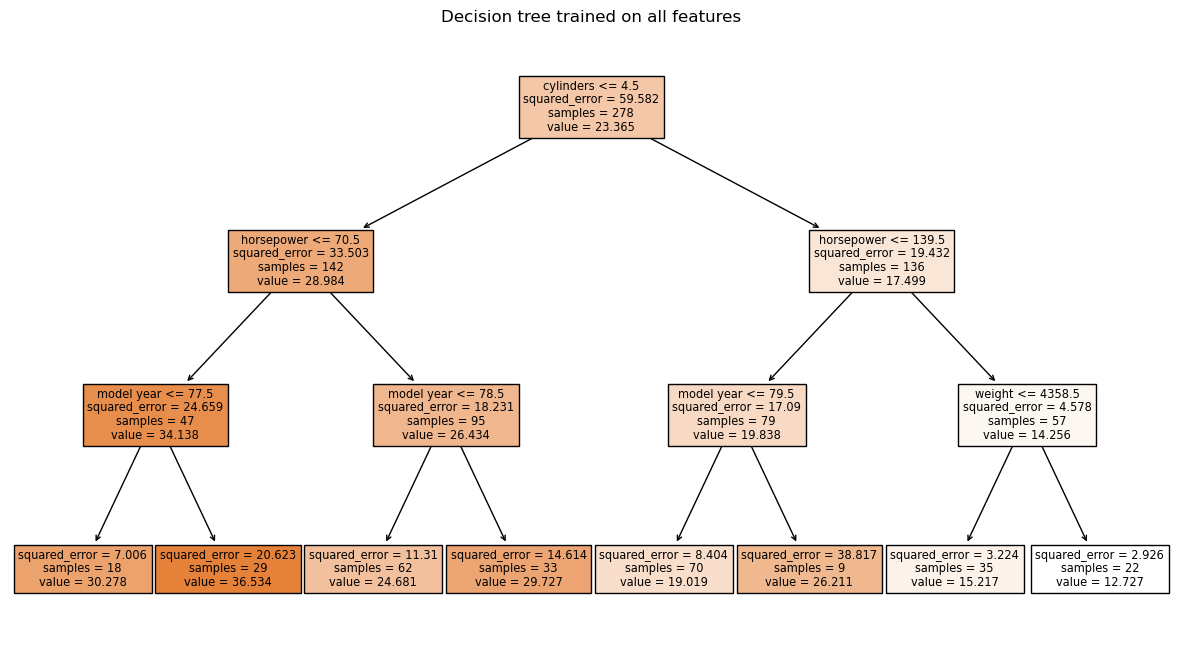

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,8))
_ = plot_tree(regressor , feature_names = X_train.columns, filled=True)
plt.title("Decision tree trained on all features")
plt.show() 

### Pour éviter le surapprentissage, on a fait un choix particulier en fixant la profondeur de l'arbre à 3.

### 4. Affichons l’importance des variables 

In [32]:
regressor.feature_importances_

array([0.67671317, 0.        , 0.21402242, 0.00618456, 0.        ,
       0.10307986, 0.        ])

In [33]:
for i in range(len(X_train.columns)) :
    print(X_train.columns[i],"              :", regressor.feature_importances_[i]*100)

cylinders               : 67.67131653729359
displacement               : 0.0
horsepower               : 21.40224179492139
weight               : 0.618455922416783
acceleration               : 0.0
model year               : 10.307985745368233
origin               : 0.0


La variable  la plus importante est celle ayant une grande valeur. Ainsi dans l'ordre croissant d'importance des variables
on a cylinders (très importante), horsepower, model year suivi de weight. Les variables displacement, acceleration et origin ne sont pas importantes.

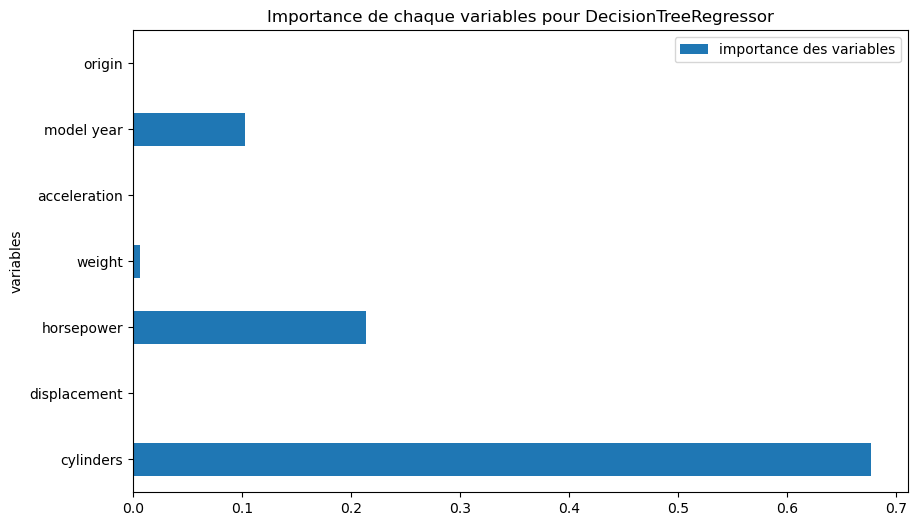

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
(pd.DataFrame({"variables" : X_train.columns, "importance des variables" : regressor.feature_importances_})
.set_index("variables")
.plot.barh(ax=ax)
)
plt.title("Importance de chaque variables pour DecisionTreeRegressor")
plt.show() 

### 5. Affichons les valeurs des mesures d’erreurs mean square error, absolute mean square error, R**2

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
y_pred = regressor.predict(X_test)
pd.DataFrame({"mean squared error" : [mean_squared_error(y_test,y_pred)],
              "mean absolute error" : [mean_absolute_error(y_test,y_pred)],
              "R**2" : [r2_score(y_test,y_pred)]},
              index = ["decision tree regressor"])

mean squared error  mean absolute error      R**2
decision tree regressor           12.207366             2.632733  0.808967

### Nous obtenons les valeurs suivantes: mean squared error =12.207366 , mean absolute error = 2.632733 et R**2  = 0.808967

### 6. Forêt aléatoire de regrèssion.

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=15, n_estimators = 200)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=15)

In [38]:
# Les paramètres définis du modèle
rf_reg.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 15,
 'verbose': 0,
 'warm_start': False}

In [39]:
rf_reg.feature_importances_

array([0.1366666 , 0.27336968, 0.20492278, 0.23375404, 0.03311185,
       0.11145288, 0.00672217])

In [40]:
for i in range(len(X_train.columns)) :
    print(X_train.columns[i],"              :",rf_reg.feature_importances_[i]*100)

cylinders               : 13.666660129601121
displacement               : 27.33696759261248
horsepower               : 20.492278316395623
weight               : 23.375403777616782
acceleration               : 3.3111849137528044
model year               : 11.145287791628332
origin               : 0.6722174783928575


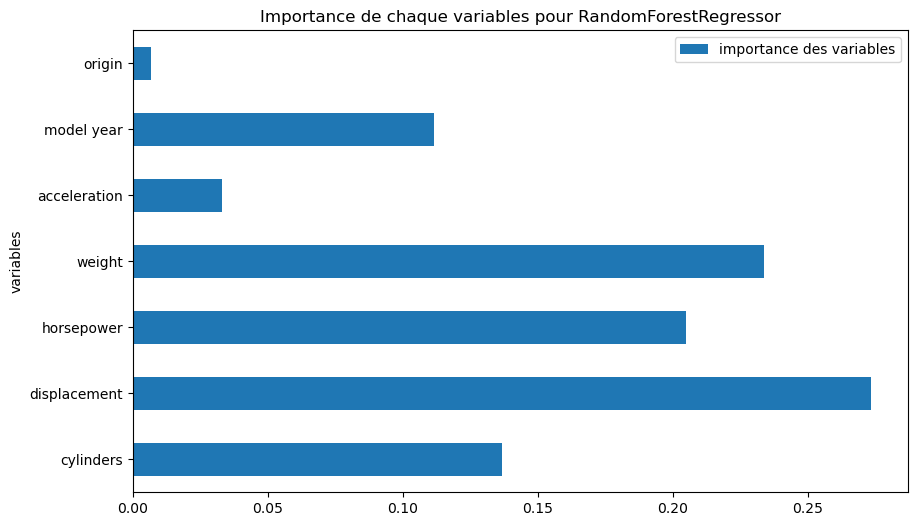

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
(pd.DataFrame({"variables" : X_train.columns, "importance des variables" : rf_reg.feature_importances_})
.set_index("variables")
.plot.barh(ax=ax)
)
plt.title("Importance de chaque variables pour RandomForestRegressor")
plt.show() 

In [42]:
y_pred_rf = rf_reg.predict(X_test)
pd.DataFrame({"mean squared error" : [mean_squared_error(y_test,y_pred), mean_squared_error(y_test,y_pred_rf)],
              "mean absolute error" : [mean_absolute_error(y_test,y_pred), mean_absolute_error(y_test,y_pred_rf)],
              "R**2" : [r2_score(y_test,y_pred), r2_score(y_test,y_pred_rf)]},
              index = ["decision tree regressor",  " random forest regressor"])

mean squared error  mean absolute error      R**2
decision tree regressor            12.207366             2.632733  0.808967
 random forest regressor            6.707106             1.841092  0.895041

### Pour le random forest regressor, nous obtenons les valeurs suivantes: mean squared error = 6.707106, mean absolute error = 1.841092 et R**2 = 0.895041

### En comparant les valeurs, le meilleur modèle est le random forest regressor
### Un arbre de regression étant un appreneur faible, la combinaison d’appreneurs faibles (différents) permet de réduire la variance du modèle 
### La forêt  aléatoire a amélioré les prédictions.

# Conclusion :

### Les limites du modèle

### Une première limite du modèle est la non normalité des variables quantitatives.
### Le choix particulier de la profondeur de l'arbre de regression peut être une deuxième limite. On aurait pu laisser l'arbre se construire sans critère d'arrêt puis proceder à l'élagage.

# Exercice 3 : Clustering

### 1. Préparons les données. 

In [43]:
data_final2 = data_final.copy(deep=True)
data_final2

mpg cylinders  displacement  horsepower  weight  acceleration  \
0    18.0         8         307.0       130.0  3504.0          12.0   
1    15.0         8         350.0       165.0  3693.0          11.5   
2    18.0         8         318.0       150.0  3436.0          11.0   
3    16.0         8         304.0       150.0  3433.0          12.0   
4    17.0         8         302.0       140.0  3449.0          10.5   
..    ...       ...           ...         ...     ...           ...   
393  27.0         4         140.0        86.0  2790.0          15.6   
394  44.0         4          97.0        52.0  2130.0          24.6   
395  32.0         4         135.0        84.0  2295.0          11.6   
396  28.0         4         120.0        79.0  2625.0          18.6   
397  31.0         4         119.0        82.0  2720.0          19.4   

    model year origin                   car name  
0           70      1  chevrolet chevelle malibu  
1           70      1          buick skylark 320  
2           70      1         plymouth satellite  
3           70      1              amc rebel sst  
4           70      1                ford torino  
..         ...    ...                        ...  
393         82      1            ford mustang gl  
394         82      2                  vw pickup  
395         82      1              dodge rampage  
396         82      1                ford ranger  
397         82      1                 chevy s-10  

[398 rows x 9 columns]

In [44]:
X = data_final2.iloc[:,:-1]
X

mpg cylinders  displacement  horsepower  weight  acceleration  \
0    18.0         8         307.0       130.0  3504.0          12.0   
1    15.0         8         350.0       165.0  3693.0          11.5   
2    18.0         8         318.0       150.0  3436.0          11.0   
3    16.0         8         304.0       150.0  3433.0          12.0   
4    17.0         8         302.0       140.0  3449.0          10.5   
..    ...       ...           ...         ...     ...           ...   
393  27.0         4         140.0        86.0  2790.0          15.6   
394  44.0         4          97.0        52.0  2130.0          24.6   
395  32.0         4         135.0        84.0  2295.0          11.6   
396  28.0         4         120.0        79.0  2625.0          18.6   
397  31.0         4         119.0        82.0  2720.0          19.4   

    model year origin  
0           70      1  
1           70      1  
2           70      1  
3           70      1  
4           70      1  
..         ...    ...  
393         82      1  
394         82      2  
395         82      1  
396         82      1  
397         82      1  

[398 rows x 8 columns]

La variable "car name" servira d’étiquette et donc ne sera donc pas utilisée comme variable d’entrée.

### Afin de donner le même importance à chaque variable, il est très important de centrer et réduire les données. Pour cela utilisons StandardScaler de sklearn.preprocessing pour faire la normalisation

In [45]:
from sklearn.preprocessing import StandardScaler   # Normalisation des données
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

mpg  cylinders  displacement  horsepower    weight  acceleration  \
0   -0.706439   1.498191      1.090604    0.676010  0.630870     -1.295498   
1   -1.090751   1.498191      1.503514    1.589076  0.854333     -1.477038   
2   -0.706439   1.498191      1.196232    1.197762  0.550470     -1.658577   
3   -0.962647   1.498191      1.061796    1.197762  0.546923     -1.295498   
4   -0.834543   1.498191      1.042591    0.936886  0.565841     -1.840117   
..        ...        ...           ...         ...       ...           ...   
393  0.446497  -0.856321     -0.513026   -0.471844 -0.213324      0.011586   
394  2.624265  -0.856321     -0.925936   -1.358823 -0.993671      3.279296   
395  1.087017  -0.856321     -0.561039   -0.524019 -0.798585     -1.440730   
396  0.574601  -0.856321     -0.705077   -0.654457 -0.408411      1.100822   
397  0.958913  -0.856321     -0.714680   -0.576195 -0.296088      1.391285   

     model year    origin  
0     -1.627426 -0.715145  
1     -1.627426 -0.715145  
2     -1.627426 -0.715145  
3     -1.627426 -0.715145  
4     -1.627426 -0.715145  
..          ...       ...  
393    1.621983 -0.715145  
394    1.621983  0.533222  
395    1.621983 -0.715145  
396    1.621983 -0.715145  
397    1.621983 -0.715145  

[398 rows x 8 columns]

### 2. Analyse en composantes principales.

### a) Choix du nombre de composantes principales. 

In [46]:
from sklearn.decomposition import PCA 
pca = PCA(random_state=15)
pca.get_params(deep=True)

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': 15,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [47]:
res_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.67090032, 0.11794249, 0.10225983, 0.06080068, 0.02326144,
       0.01420574, 0.00665055, 0.00397896])

### • La part de variance expliquée par la première composante principale est 67% de la variance totale

### • La part de variance expliquée par la deuxième composante principale est 12% de la variance totale

### • La part de variance expliquée par la troisième composante principale est 10% de la variance totale 

In [48]:
np.cumsum(pca.explained_variance_ratio_)*100

array([ 67.09003194,  78.88428081,  89.11026391,  95.1903324 ,
        97.51647591,  98.93704975,  99.60210434, 100.        ])

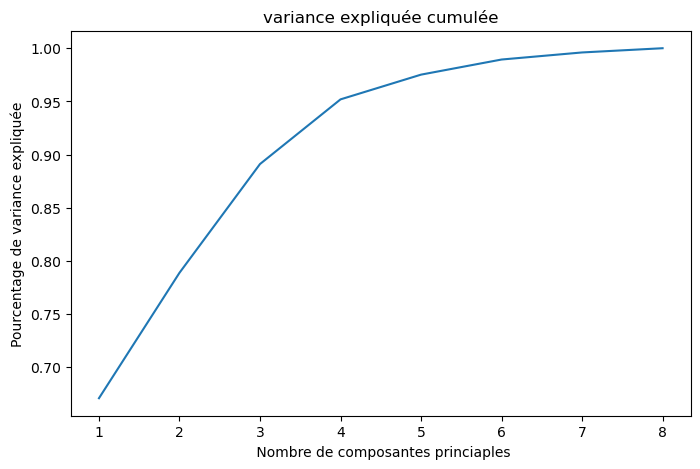

In [49]:
plt.figure(figsize=(8,5))
plt.plot(range(1,9), np.cumsum(pca.explained_variance_ratio_))
plt.title("variance expliquée cumulée")
plt.xlabel(" Nombre de composantes princiaples")
plt.ylabel("Pourcentage de variance expliquée")
plt.show() 

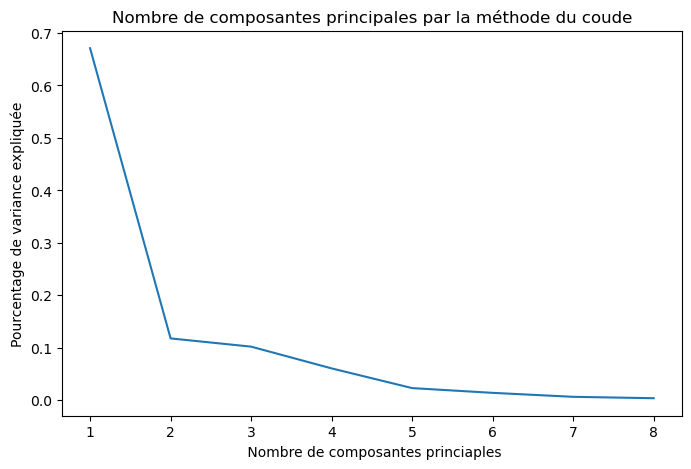

In [50]:
plt.figure(figsize=(8,5))
plt.plot(range(1,9), pca.explained_variance_ratio_)
plt.title("Nombre de composantes principales par la méthode du coude")
plt.xlabel(" Nombre de composantes princiaples")
plt.ylabel("Pourcentage de variance expliquée")
plt.show() 

### Choix des axes principaux de représentation 
### Selon les différents critères :
### • Si nous voulons expliquer au moins 80% de l’inertie totale, le choix se portera sur les trois (3) axes principaux.
### • Si nous voulons utiliser la règle du coude, nous pouvons choisir les trois (3) premiers axes.

Vu les résultats précédents, on choisit les trois (3) premiers composantes principales.

### b) ACP avec 3 composantes principales

In [51]:
pca = PCA(random_state=15, n_components=3)
pca.get_params(deep=True)

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 3,
 'random_state': 15,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [52]:
res_pca = pca.fit_transform(X_scaled)

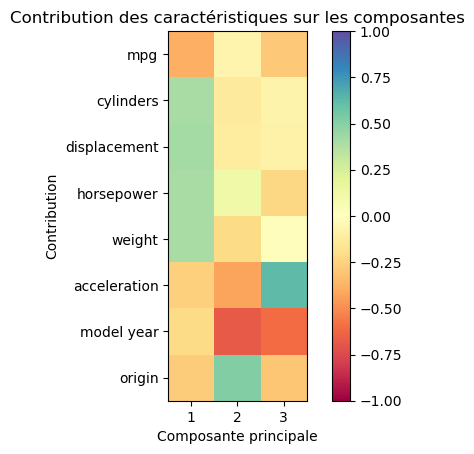

In [53]:
plt.imshow(pca.components_.T,cmap = "Spectral",vmin= -1,vmax= 1)
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(3), range(1,4))
plt.xlabel("Composante principale")
plt.ylabel("Contribution")
plt.title("Contribution des caractéristiques sur les composantes")
plt.colorbar()
plt.show() 

• Les variables "cylinders, displacement, horsepower et weight" ont plus contribué sur la première composante principale.

• La variable "origin" est celle qui a le plus contribué sur la deuxième composante principale.

• La variable "accelartion" est celle qui a plus contribution  sur la troisième composante principale.

### c) Projection dans un espace 2D

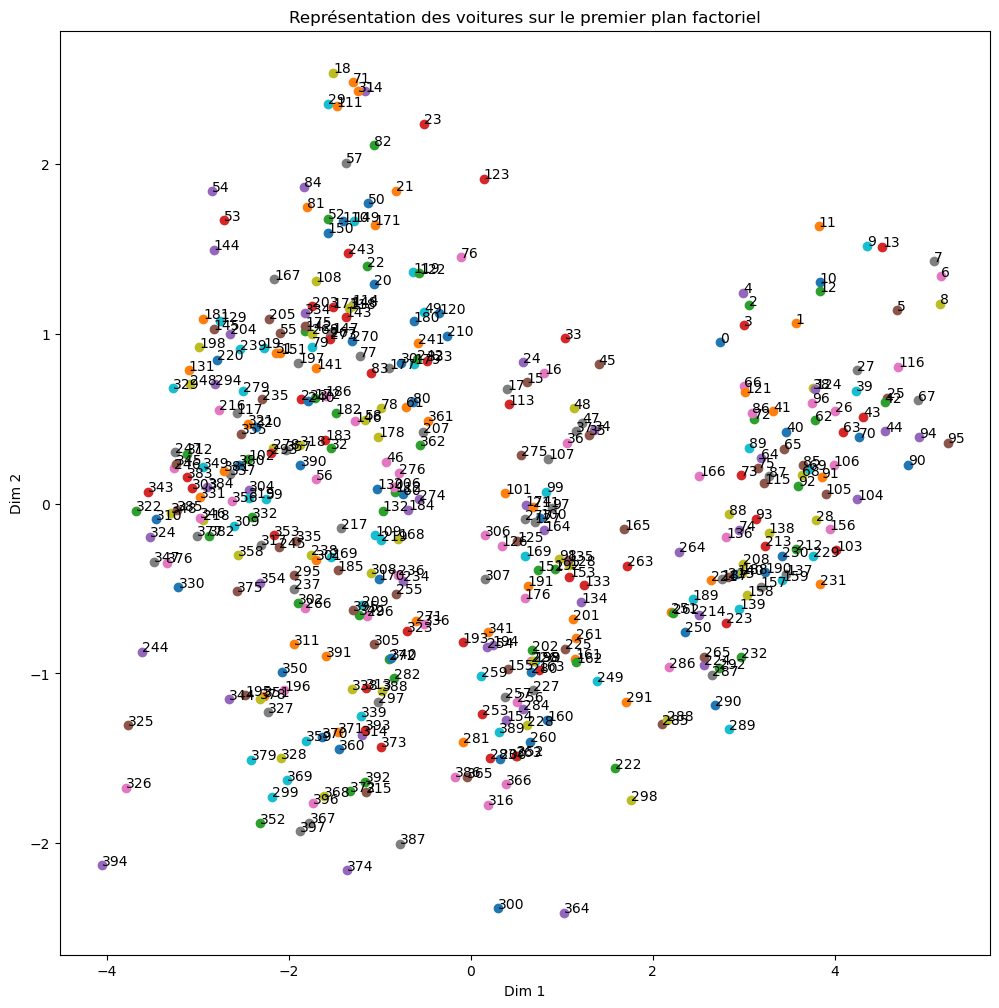

In [54]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
for i in range(len(res_pca)):
        x,y = res_pca[i,0], res_pca[i,1]
        ax.scatter(x,y)
        ax.text(x,y,i)
plt.title("Représentation des voitures sur le premier plan factoriel")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

### 3. Méthode de clustering : KMeans

In [55]:
from sklearn.cluster import KMeans
k_means = KMeans(init="k-means++", n_clusters=3, n_init=5)
k_means.get_params(deep=True)

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 5,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [56]:
k_means.fit(res_pca)

KMeans(n_clusters=3, n_init=5)

In [57]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2,
       0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2,

In [58]:
pd.DataFrame({"cluster" :k_means.labels_ }, index=data_final.iloc[:,-1])

cluster
car name                          
chevrolet chevelle malibu        1
buick skylark 320                1
plymouth satellite               1
amc rebel sst                    1
ford torino                      1
...                            ...
ford mustang gl                  0
vw pickup                        0
dodge rampage                    0
ford ranger                      0
chevy s-10                       0

[398 rows x 1 columns]

### 4. Visualisation dans l’espace 2D les clusters.

In [59]:
dt_res_pca = pd.DataFrame(res_pca, columns=["comp 1","comp 2", "comp 3"])
dt_res_pca

comp 1    comp 2    comp 3
0    2.744213  0.950906  0.236681
1    3.569719  1.062402 -0.011793
2    3.061909  1.171221 -0.119452
3    3.007197  1.049851  0.192933
4    2.996593  1.243288 -0.121878
..        ...       ...       ...
393 -1.158958 -1.332628 -0.670252
394 -4.051293 -2.128758  0.595156
395 -1.297844 -0.628492 -1.742699
396 -1.728603 -1.765327  0.030824
397 -1.881158 -1.929473  0.080044

[398 rows x 3 columns]

In [60]:
dt_res_pca["cluster"] = k_means.labels_
dt_res_pca

comp 1    comp 2    comp 3  cluster
0    2.744213  0.950906  0.236681        1
1    3.569719  1.062402 -0.011793        1
2    3.061909  1.171221 -0.119452        1
3    3.007197  1.049851  0.192933        1
4    2.996593  1.243288 -0.121878        1
..        ...       ...       ...      ...
393 -1.158958 -1.332628 -0.670252        0
394 -4.051293 -2.128758  0.595156        0
395 -1.297844 -0.628492 -1.742699        0
396 -1.728603 -1.765327  0.030824        0
397 -1.881158 -1.929473  0.080044        0

[398 rows x 4 columns]

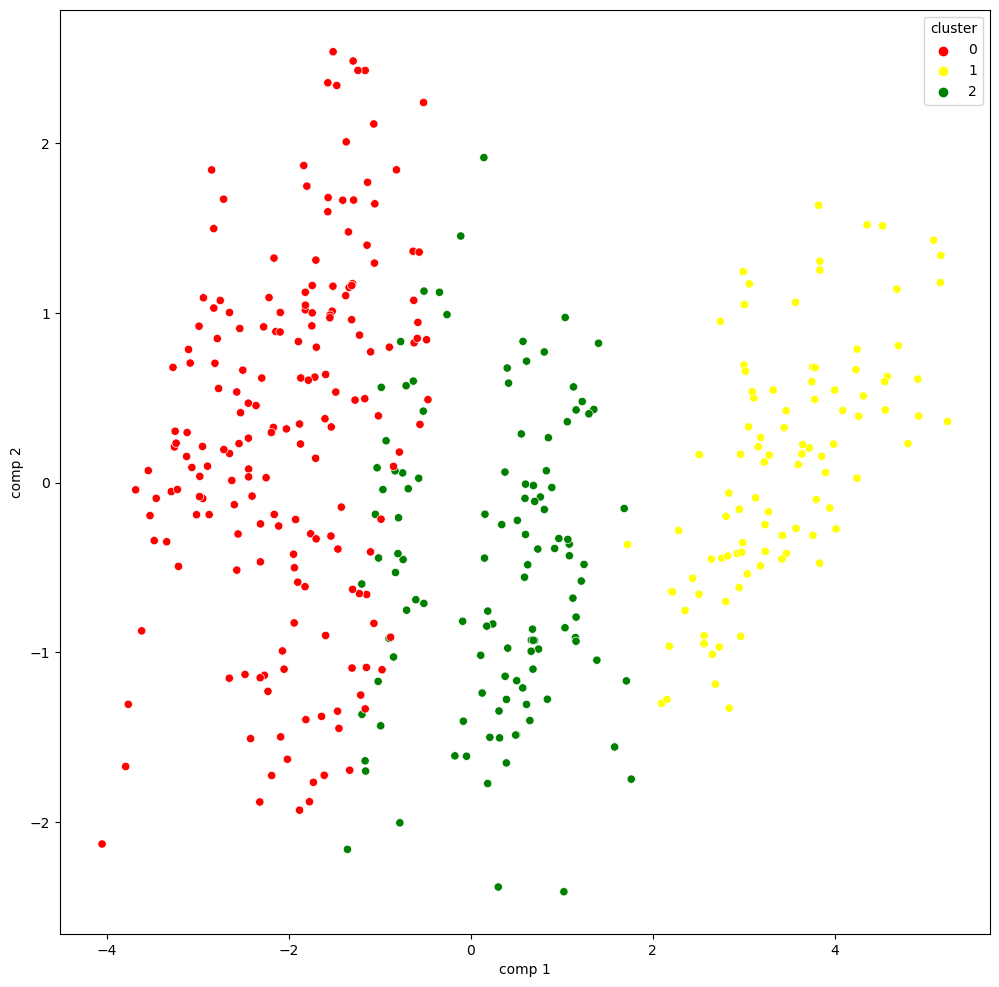

In [61]:
plt.figure(figsize=(12,12))
sns.scatterplot(data = dt_res_pca, x= "comp 1", y = "comp 2" , hue = "cluster", palette= ["red","yellow", "green"])
plt.show() 

### 5. Affichage des mesures d'erreurs.

In [62]:
from sklearn.metrics import silhouette_samples,  silhouette_score, calinski_harabasz_score, davies_bouldin_score

pd.DataFrame({"silhouette_score": [silhouette_score(res_pca, k_means.labels_)] , 
               "calinski_harabasz_score" : [calinski_harabasz_score(res_pca, k_means.labels_)],
               "davies_bouldin_score" :  [davies_bouldin_score(res_pca, k_means.labels_)]},index = ["KMeans"] )

silhouette_score  calinski_harabasz_score  davies_bouldin_score
KMeans          0.378946               455.811111              0.996049

# Conclusion : 

### Les mesures d'erreurs obtenues est liée au choix  du méthode de clustering utilisée notamment le KMeans.